In [1]:
%%capture
!pip install pandas seaborn matplotlib bokeh

In [2]:
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import bokeh as bk

In [3]:
aminoacids = pd.read_csv("./data/aminoacids_properties.csv")
aminoacids.set_index("Sym", inplace=True)
aminoacids

,Unnamed: 0,Name,Class,Polarity,Charge,Hydropathy,HelixProb,SheetProb,ResidueWeight,pKa1,pKb2,pKx3,pl4
Sym,,,,,,,,,,,,,
A,Ala,Alanine,Aliphatic,Nonpolar,Neutral,1.8,0.42,0.23,71.08,2.34,9.69,0.00,6.00
R,Arg,Arginine,Basic,Basic polar,Positive,-4.5,0.36,0.25,156.19,2.17,9.04,12.48,10.76
N,Asn,Asparagine,Amide,Polar,Neutral,-3.5,0.21,0.22,114.11,2.02,8.80,0.00,5.41
D,Asp,Aspartic acid,Acid,Acidic polar,Negative,-3.5,0.25,0.20,115.09,1.88,9.60,3.65,2.77
C,Cys,Cysteine,Sulfuric,Nonpolar,Neutral,2.5,0.17,0.41,103.15,1.96,10.28,8.18,5.07
E,Glu,Glutamic acid,Acid,Acidic polar,Negative,-3.5,0.42,0.21,129.12,2.19,9.67,4.25,3.22
Q,Gln,Glutamine,Amide,Polar,Neutral,-3.5,0.36,0.25,128.13,2.17,9.13,0.00,5.65
G,Gly,Glycine,Aliphatic,Nonpolar,Neutral,-0.4,0.13,0.15,57.05,2.34,9.60,0.00,5.97
H,His,Histidine,Basic aromatic,Basic polar,Positive,-3.2,0.27,0.30,137.14,1.82,9.17,6.00,7.59


In [4]:
single_train = pd.read_csv("./data/single_muts_train.csv", index_col=0)
single_train

,name,sequence,secondary_structure,stabilityscore
0,EHEE_rd2_0005.pdb_V26L,GSSTTRYRFTDEEEARRAAKEWARRGYQLHVTQNGTYWEVEVR,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.72
1,HHH_rd2_0134.pdb_R22D,SKDEAQREAERAIRSGNKEEADRILEEAGYSPEQAERIIRKLG,THHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHT,1.22
2,HHH_rd2_0134.pdb_Q6K,SKDEAKREAERAIRSGNKEEARRILEEAGYSPEQAERIIRKLG,THHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHT,1.20
3,EHEE_0882.pdb_E2I,GSSQITIEVEDEEEARRVAKELRKKGYEVKIERRGNKWHVHRT,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,1.59
4,EEHEE_rd3_1716.pdb_A26R,TEVHLGDIKLKYPNPEQAKKAAEKLRQKYNLTWTVIGDYVKIE,TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET,0.88
...,...,...,...,...
8545,HHH_rd2_0134.pdb_Y30N,SKDEAQREAERAIRSGNKEEARRILEEAGNSPEQAERIIRKLG,THHHHHHHHHHHHHTTTHHHHHHHHHHHTTTHHHHHHHHHHHT,1.13
8546,EHEE_rd2_0005.pdb_W35E,GSSTTRYRFTDEEEARRAAKEWARRGYQVHVTQNGTYEEVEVR,TTTTEEEEETTHHHHHHHHHHHHHHTTTEEEEEETTEEEEEET,0.44
8547,HEEH_rd3_0872.pdb_A35T,TWQDLVKIAEKALEKGEPITINGITVTTKEQAKQTIEYLKKAY,THHHHHHHHHHHHHTTEEEETTEEEETTTHHHHHHHHHHHHHT,0.64
8548,EEHEE_rd3_0037.pdb_E17S,TTIKVNGQEYTVPLSPSQAAKAAKKRWPDYEVQIHGNTVKVTR,TEEEETTEEEETTTHHHHHHHHHHHHHHHTTTEEEETTEEEET,0.68


In [5]:
single_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8550 entries, 0 to 8549
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   name                 8550 non-null   object 
 1   sequence             8550 non-null   object 
 2   secondary_structure  8550 non-null   object 
 3   stabilityscore       8550 non-null   float64
dtypes: float64(1), object(3)
memory usage: 334.0+ KB


In [6]:
single_train.describe()

,stabilityscore
count,8550.000000
mean,1.054056
std,0.400587
min,-0.270000
25%,0.790000
50%,1.040000
75%,1.320000
max,2.400000


In [7]:
sequence_len = single_train["sequence"].apply(lambda x: len(str(x)))
sequence_len.describe()

count    8550.0
mean       43.0
std         0.0
min        43.0
25%        43.0
50%        43.0
75%        43.0
max        43.0
Name: sequence, dtype: float64

In [8]:
secondary_len = single_train["secondary_structure"].apply(lambda x: len(str(x)))
secondary_len.describe()

count    8550.0
mean       43.0
std         0.0
min        43.0
25%        43.0
50%        43.0
75%        43.0
max        43.0
Name: secondary_structure, dtype: float64

In [9]:
sequence_aminoacids = {
    aminoacid
    for sequence in single_train["sequence"]
    for aminoacid in sequence
}
sequence_aminoacids, len(sequence_aminoacids)

({'A',
  'D',
  'E',
  'F',
  'G',
  'H',
  'I',
  'K',
  'L',
  'M',
  'N',
  'P',
  'Q',
  'R',
  'S',
  'T',
  'V',
  'W',
  'Y'},
 19)

In [10]:
sequence_aminoacids.issubset(set(aminoacids.index))

True

In [11]:
aminoacids = aminoacids.loc[list(sequence_aminoacids), :]

In [12]:
sequence_freq = pd.DataFrame(
    dict(Counter(sequence))
    for sequence in single_train["sequence"]
).reindex(sorted(sequence_aminoacids), axis=1)
sequence_freq = sequence_freq.fillna(0)
sequence_freq

,A,D,E,F,G,H,I,K,L,M,N,P,Q,R,S,T,V,W,Y
0,4,1.0,6.0,1.0,3.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,2.0,7.0,2.0,5.0,3.0,2.0,3.0
1,6,2.0,9.0,0.0,3.0,0.0,4.0,3.0,2.0,0.0,1.0,1.0,2.0,6.0,3.0,0.0,0.0,0.0,1.0
2,6,1.0,9.0,0.0,3.0,0.0,4.0,4.0,2.0,0.0,1.0,1.0,1.0,7.0,3.0,0.0,0.0,0.0,1.0
3,2,1.0,8.0,0.0,3.0,2.0,3.0,5.0,1.0,0.0,1.0,0.0,1.0,6.0,2.0,2.0,4.0,1.0,1.0
4,3,2.0,4.0,0.0,2.0,1.0,3.0,7.0,4.0,0.0,2.0,2.0,2.0,1.0,0.0,3.0,3.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8545,6,1.0,9.0,0.0,3.0,0.0,4.0,3.0,2.0,0.0,2.0,1.0,2.0,7.0,3.0,0.0,0.0,0.0,0.0
8546,4,1.0,7.0,1.0,3.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,7.0,2.0,5.0,4.0,1.0,3.0
8547,4,1.0,5.0,0.0,2.0,0.0,5.0,7.0,3.0,0.0,1.0,1.0,3.0,0.0,0.0,6.0,2.0,1.0,2.0
8548,4,1.0,2.0,0.0,2.0,1.0,2.0,5.0,1.0,0.0,2.0,3.0,3.0,2.0,2.0,5.0,5.0,1.0,2.0


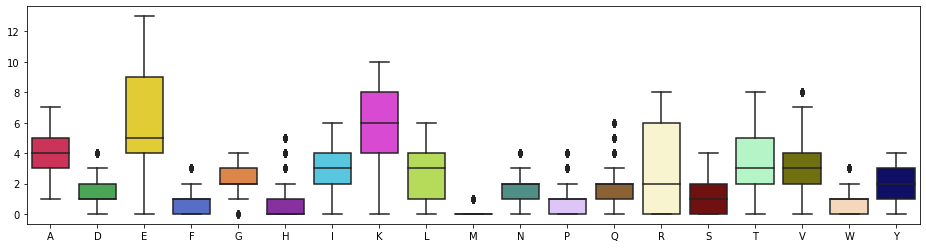

In [13]:
color = {
    "boxes": sns.color_palette("tab10")[0],
    "whiskers": sns.color_palette("tab10")[1],
    "medians": sns.color_palette("tab10")[3],
    "caps": sns.color_palette("tab10")[4],
}



#_ = sequence_freq.plot(subplots=True, figsize=(16, 4), kind='box', palette=color)

palette=list(['#e6194B', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#42d4f4', '#f032e6', 
             '#bfef45', '#fabed4', '#469990', '#dcbeff', '#9A6324', '#fffac8', '#800000', '#aaffc3', 
             '#808000', '#ffd8b1', '#000075', '#a9a9a9', '#ffffff', '#000000'])
fig, ax = plt.subplots(figsize=(16, 4))
sns.boxplot(data = sequence_freq, ax=ax, palette=palette)

In [14]:
len(list(sequence_freq))

19

In [15]:
sequence_freq = sequence_freq.div(sequence_freq.sum(axis=1), axis=0)

In [16]:
structure_freq = pd.DataFrame(
    dict(Counter(structure))
    for structure in single_train["secondary_structure"]
)
structure_freq = structure_freq.fillna(0)
structure_freq

,T,E,H
0,12,17.0,14
1,8,0.0,35
2,8,0.0,35
3,12,17.0,14
4,12,16.0,15
...,...,...,...
8545,8,0.0,35
8546,12,17.0,14
8547,9,8.0,26
8548,12,16.0,15


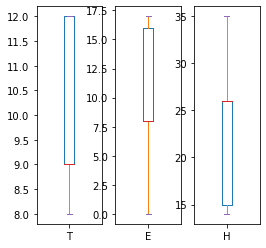

In [17]:
_ = structure_freq.plot(subplots=True, figsize=(4, 4), kind='box', color=color)

In [18]:
structure_freq = structure_freq.div(structure_freq.sum(axis=1), axis=0)

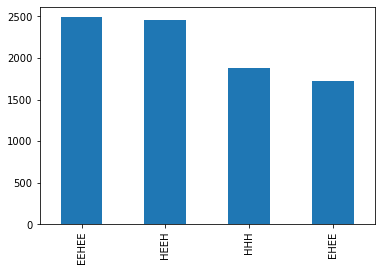

In [19]:
structure_type = single_train["name"].apply(lambda x: x.split("_")[0])
structure_type.value_counts().plot.bar()

In [20]:
encoding = ["Class", "Polarity", "Charge"]
aminoacids = pd.concat([
    pd.get_dummies(aminoacids[e], prefix=e) for e in encoding
] + [aminoacids.iloc[:, 2:]], axis=1)
aminoacids.drop(encoding, axis=1, inplace=True)
aminoacids

,Class_Acid,Class_Aliphatic,Class_Amide,Class_Aromatic,Class_Basic,Class_Basic aromatic,Class_Cyclic,Class_Hydroxylic,Class_Sulfuric,Polarity_Acidic polar,...,Charge_Neutral,Charge_Positive,Hydropathy,HelixProb,SheetProb,ResidueWeight,pKa1,pKb2,pKx3,pl4
Sym,,,,,,,,,,,,,,,,,,,,,
S,0,0,0,0,0,0,0,1,0,0,...,1,0,-0.8,0.20,0.28,87.08,2.21,9.15,0.00,5.68
N,0,0,1,0,0,0,0,0,0,0,...,1,0,-3.5,0.21,0.22,114.11,2.02,8.80,0.00,5.41
K,0,0,0,0,1,0,0,0,0,0,...,0,1,-3.9,0.32,0.27,128.18,2.18,8.95,10.53,9.74
E,1,0,0,0,0,0,0,0,0,1,...,0,0,-3.5,0.42,0.21,129.12,2.19,9.67,4.25,3.22
I,0,1,0,0,0,0,0,0,0,0,...,1,0,4.5,0.30,0.45,113.16,2.36,9.60,0.00,6.02
Y,0,0,0,1,0,0,0,0,0,0,...,1,0,-1.3,0.25,0.41,163.18,2.20,9.11,10.07,5.66
F,0,0,0,1,0,0,0,0,0,0,...,1,0,2.8,0.30,0.38,147.18,1.83,9.13,0.00,5.48
G,0,1,0,0,0,0,0,0,0,0,...,1,0,-0.4,0.13,0.15,57.05,2.34,9.60,0.00,5.97
R,0,0,0,0,1,0,0,0,0,0,...,0,1,-4.5,0.36,0.25,156.19,2.17,9.04,12.48,10.76


In [21]:
aminoacids = (aminoacids - aminoacids.min()) / (aminoacids.max() - aminoacids.min())

In [22]:
def get_sequence_features(sequence: str):
    return np.vstack([
        aminoacids.T[s].values
        for s in sequence
    ])

In [23]:
sequence_feat = np.array([
    get_sequence_features(s)
    for s in single_train["sequence"]
])

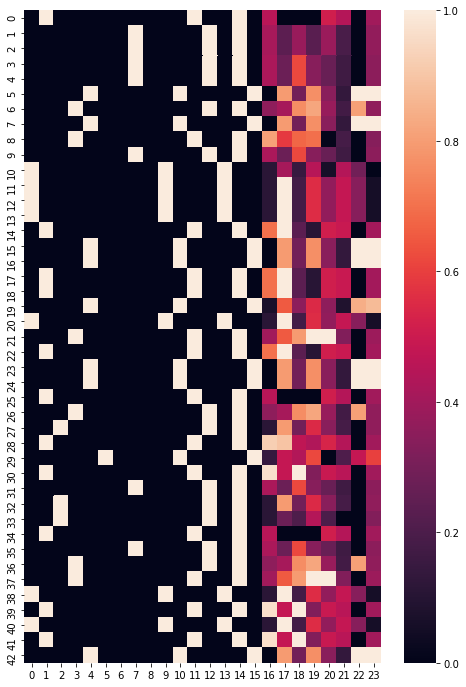

In [24]:
_, ax = plt.subplots(figsize=(8, 12))
_ = sns.heatmap(sequence_feat[0], ax=ax)

In [25]:
structures = {
    "T": np.array([1, 0, 0]),
    "H": np.array([0, 1, 0]),
    "E": np.array([0, 0, 1]),
}

In [26]:
def get_structure_features(structure: str):
    return np.vstack([
        structures[s]
        for s in structure
    ])

In [27]:
structure_feat = np.array([
    get_structure_features(s)
    for s in single_train["secondary_structure"]
])

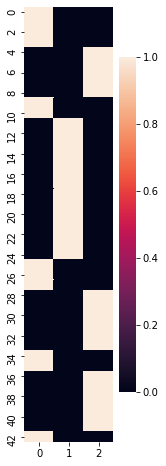

In [28]:
_, ax = plt.subplots(figsize=(2, 8))
_ = sns.heatmap(structure_feat[0], ax=ax)

In [29]:
np.savez_compressed("./data/data.npz", **{
    "sequence_freq": sequence_freq,
    "structure_freq": structure_freq,
    "sequence_feat": sequence_feat,
    "structure_feat": structure_feat,
    "score": single_train["stabilityscore"]
})